In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the API key.
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [6]:
# Import the requests library.
import requests

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

# Import the datetime module from the datetime library.
from datetime import datetime

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b89a50ca72377ea56cb819a8b6bb8d2


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | kaitangata
Processing Record 2 of Set 12 | tiksi
Processing Record 3 of Set 12 | busselton
Processing Record 4 of Set 12 | coffs harbour
Processing Record 5 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 6 of Set 12 | anadyr
Processing Record 7 of Set 12 | okhotsk
Processing Record 8 of Set 12 | lagoa
Processing Record 9 of Set 12 | tsybuliv
Processing Record 10 of Set 12 | majene
Processing Record 11 of Set 12 | punta arenas
Processing Record 12 of Set 12 | kapaa
Processing Record 13 of Set 12 | ushuaia
Processing Record 14 of Set 12 | sulangan
Processing Record 15 of Set 12 | prince rupert
Processing Record 16 of Set 12 | mataura
Processing Record 17 of Set 12 | port hedland
Processing Record 18 of Set 12 | sitka
Processing Record 19 of Set 12 | sao filipe
Processing Record 20 of Set 12 | phangnga
Processing Record 21 of Set 12 | rio gallegos
Processing Record 22 of Set

City not found. Skipping...
Processing Record 38 of Set 15 | hasaki
Processing Record 39 of Set 15 | pisco
Processing Record 40 of Set 15 | callaguip
Processing Record 41 of Set 15 | fairbanks
Processing Record 42 of Set 15 | sunbury
Processing Record 43 of Set 15 | agadez
Processing Record 44 of Set 15 | upington
Processing Record 45 of Set 15 | la ronge
Processing Record 46 of Set 15 | mount gambier
Processing Record 47 of Set 15 | east grinstead
Processing Record 48 of Set 15 | asyut
Processing Record 49 of Set 15 | nautla
Processing Record 50 of Set 15 | calama
Processing Record 1 of Set 16 | lavrentiya
Processing Record 2 of Set 16 | auki
Processing Record 3 of Set 16 | lebu
Processing Record 4 of Set 16 | tabou
Processing Record 5 of Set 16 | karratha
Processing Record 6 of Set 16 | kachkanar
Processing Record 7 of Set 16 | kahului
Processing Record 8 of Set 16 | kirkwall
Processing Record 9 of Set 16 | sola
Processing Record 10 of Set 16 | knysna
Processing Record 11 of Set 16 |

Processing Record 25 of Set 19 | ostrovnoy
Processing Record 26 of Set 19 | visby
Processing Record 27 of Set 19 | sorong
Processing Record 28 of Set 19 | rocha
Processing Record 29 of Set 19 | te anau
Processing Record 30 of Set 19 | la libertad
Processing Record 31 of Set 19 | santiago de cao
Processing Record 32 of Set 19 | fortuna
Processing Record 33 of Set 19 | taksimo
Processing Record 34 of Set 19 | mana
Processing Record 35 of Set 19 | richland
Processing Record 36 of Set 19 | gao
Processing Record 37 of Set 19 | dunedin
Processing Record 38 of Set 19 | laiagam
City not found. Skipping...
Processing Record 39 of Set 19 | upata
Processing Record 40 of Set 19 | leningradskiy
Processing Record 41 of Set 19 | kurilsk
Processing Record 42 of Set 19 | hamilton
Processing Record 43 of Set 19 | boshnyakovo
Processing Record 44 of Set 19 | san patricio
Processing Record 45 of Set 19 | erenhot
Processing Record 46 of Set 19 | richard toll
City not found. Skipping...
Processing Record 47

Processing Record 10 of Set 23 | mizan teferi
Processing Record 11 of Set 23 | karpathos
Processing Record 12 of Set 23 | mookane
Processing Record 13 of Set 23 | forestville
Processing Record 14 of Set 23 | new ulm
Processing Record 15 of Set 23 | abha
Processing Record 16 of Set 23 | grenaa
Processing Record 17 of Set 23 | guerrero negro
Processing Record 18 of Set 23 | claveria
Processing Record 19 of Set 23 | quchan
Processing Record 20 of Set 23 | chiredzi
Processing Record 21 of Set 23 | lloydminster
Processing Record 22 of Set 23 | sahrak
City not found. Skipping...
Processing Record 23 of Set 23 | labelle
Processing Record 24 of Set 23 | ye
City not found. Skipping...
Processing Record 25 of Set 23 | nouadhibou
Processing Record 26 of Set 23 | mutsu
Processing Record 27 of Set 23 | uniao da victoria
City not found. Skipping...
Processing Record 28 of Set 23 | baijiantan
Processing Record 29 of Set 23 | puerto maldonado
Processing Record 30 of Set 23 | quang ngai
Processing Reco

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaitangata,-46.2817,169.8464,52.93,85,100,12.55,NZ,2021-05-28 20:42:14
1,Tiksi,71.6872,128.8694,32.56,97,100,13.11,RU,2021-05-28 20:42:14
2,Busselton,-33.6500,115.3333,59.09,89,69,10.67,AU,2021-05-28 20:42:14
3,Coffs Harbour,-30.3000,153.1333,53.56,62,97,13.80,AU,2021-05-28 20:42:15
4,Anadyr,64.7500,177.4833,41.50,56,0,4.00,RU,2021-05-28 20:42:15
5,Okhotsk,59.3833,143.3000,37.89,82,100,11.88,RU,2021-05-28 20:42:16
6,Lagoa,39.0500,-27.9833,61.75,72,97,9.91,PT,2021-05-28 20:42:16
7,Tsybuliv,49.0766,29.8461,58.08,95,96,9.26,UA,2021-05-28 20:42:16
8,Majene,-3.5403,118.9707,77.32,90,59,9.26,ID,2021-05-28 20:42:17
9,Punta Arenas,-53.1500,-70.9167,37.51,60,40,20.27,CL,2021-05-28 20:42:17


In [12]:
# Rearranging columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kaitangata,NZ,2021-05-28 20:42:14,-46.2817,169.8464,52.93,85,100,12.55
1,Tiksi,RU,2021-05-28 20:42:14,71.6872,128.8694,32.56,97,100,13.11
2,Busselton,AU,2021-05-28 20:42:14,-33.6500,115.3333,59.09,89,69,10.67
3,Coffs Harbour,AU,2021-05-28 20:42:15,-30.3000,153.1333,53.56,62,97,13.80
4,Anadyr,RU,2021-05-28 20:42:15,64.7500,177.4833,41.50,56,0,4.00
5,Okhotsk,RU,2021-05-28 20:42:16,59.3833,143.3000,37.89,82,100,11.88
6,Lagoa,PT,2021-05-28 20:42:16,39.0500,-27.9833,61.75,72,97,9.91
7,Tsybuliv,UA,2021-05-28 20:42:16,49.0766,29.8461,58.08,95,96,9.26
8,Majene,ID,2021-05-28 20:42:17,-3.5403,118.9707,77.32,90,59,9.26
9,Punta Arenas,CL,2021-05-28 20:42:17,-53.1500,-70.9167,37.51,60,40,20.27


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1622236923.8064742

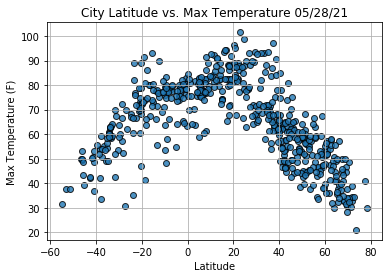

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

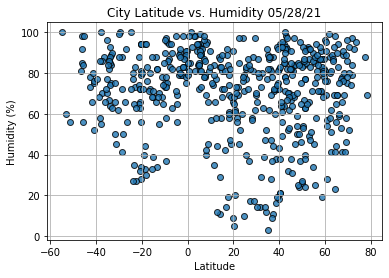

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

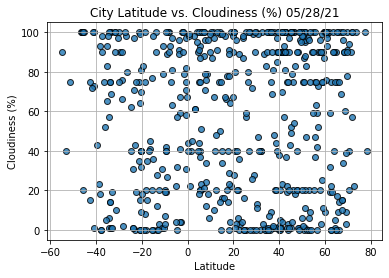

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

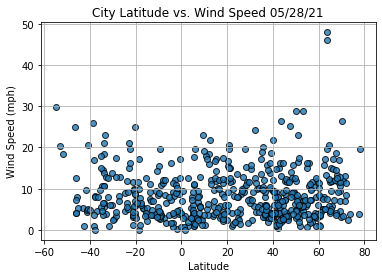

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                Prince Rupert
Country                        CA
Date          2021-05-28 20:42:18
Lat                       54.3161
Lng                       -130.32
Max Temp                    51.49
Humidity                       71
Cloudiness                     90
Wind Speed                   5.75
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
541     True
542     True
543     True
544    False
545     True
Name: Lat, Length: 546, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Tiksi,RU,2021-05-28 20:42:14,71.6872,128.8694,32.56,97,100,13.11
4,Anadyr,RU,2021-05-28 20:42:15,64.7500,177.4833,41.50,56,0,4.00
5,Okhotsk,RU,2021-05-28 20:42:16,59.3833,143.3000,37.89,82,100,11.88
6,Lagoa,PT,2021-05-28 20:42:16,39.0500,-27.9833,61.75,72,97,9.91
7,Tsybuliv,UA,2021-05-28 20:42:16,49.0766,29.8461,58.08,95,96,9.26


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

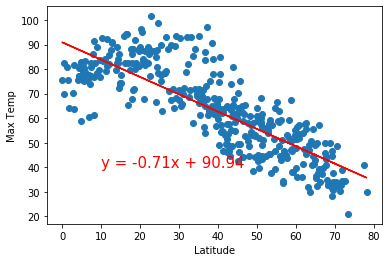

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

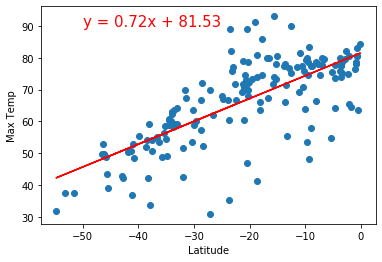

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

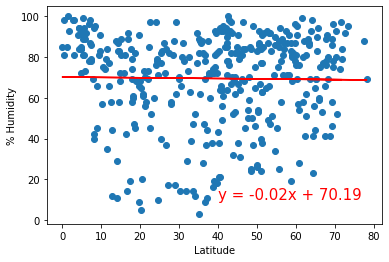

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

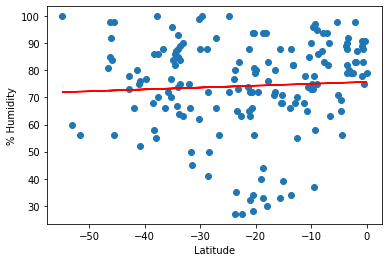

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

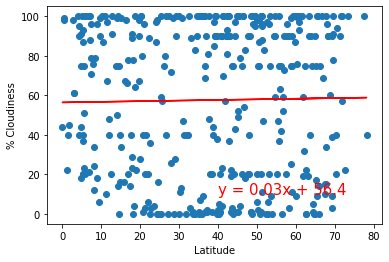

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

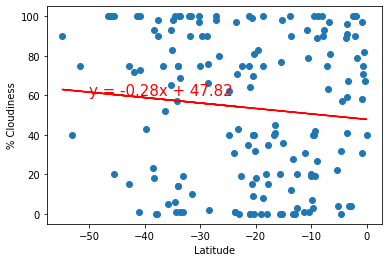

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

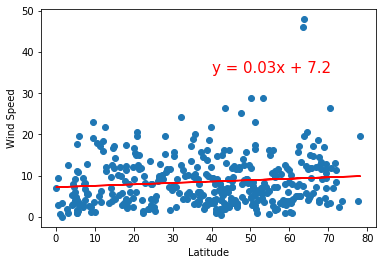

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

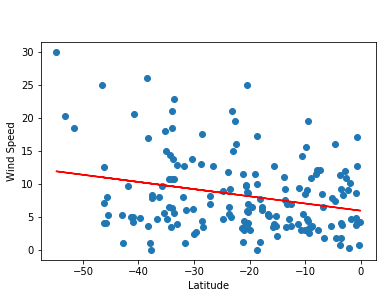

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))